In [1]:
import math
from scipy.constants import year, hour, au, G
from astropy.constants import M_sun

In [245]:
M = M_sun.value  #mass of the Sun in kg
#orbital parameters of planets
#mass in kg
m = 1e24 * np.array([0.33011, 4.8675, 5.9723, 0.64171, 
                     1898.19, 568.34, 86.813, 102.413])
#semi-major axis in m
a = 1e9 * np.array([57.9, 108.21, 149.60, 227.92,
                    778.57, 1433.53, 2872.46, 4495.06])
#use Kepler's third law to calculate period in s
T_test_mass = 2 * math.pi * (G*M)**(-1/2) * a ** (3/2)
T_two_body = 2 *math.pi * (G* (M + m)) ** (-1/2) *a ** (3/2)
print("T  [yr]  dev  [hr]  dev  rel.")
for val1, val2 in zip(T_test_mass, T_two_body):
    dev = val1 - val2
    if dev > hour:
        line = f"{val2/year:6.2f}   {dev/hour:<7.1f}   {dev/val1:.1e}"
    else:
        line = f"{val2/year:6.2f}   {dev/hour:7.4f}   {dev/val1:.1e}"
    print(line)

T  [yr]  dev  [hr]  dev  rel.
  0.24    0.0002   8.3e-08
  0.62    0.0066   1.2e-06
  1.00    0.0132   1.5e-06
  1.88    0.0027   1.6e-07
 11.88   49.6      4.8e-04
 29.68   37.2      1.4e-04
 84.20   16.1      2.2e-05
164.82   37.2      2.6e-05


In [45]:
plt.figure()
plt.loglog(a/au, T_test_mass/year, 'blue', linestyle='--',\
          label='test mass')
plt.loglog(a/au, T_two_body/year, 'ro', label='planets')
plt.legend(loc='lower right')
plt.xlabel("semi-major axis [AU]")
plt.ylabel("orbital period [yr]")
plt.tight_layout()
plt.savefig('kepler_third_law.pdf')

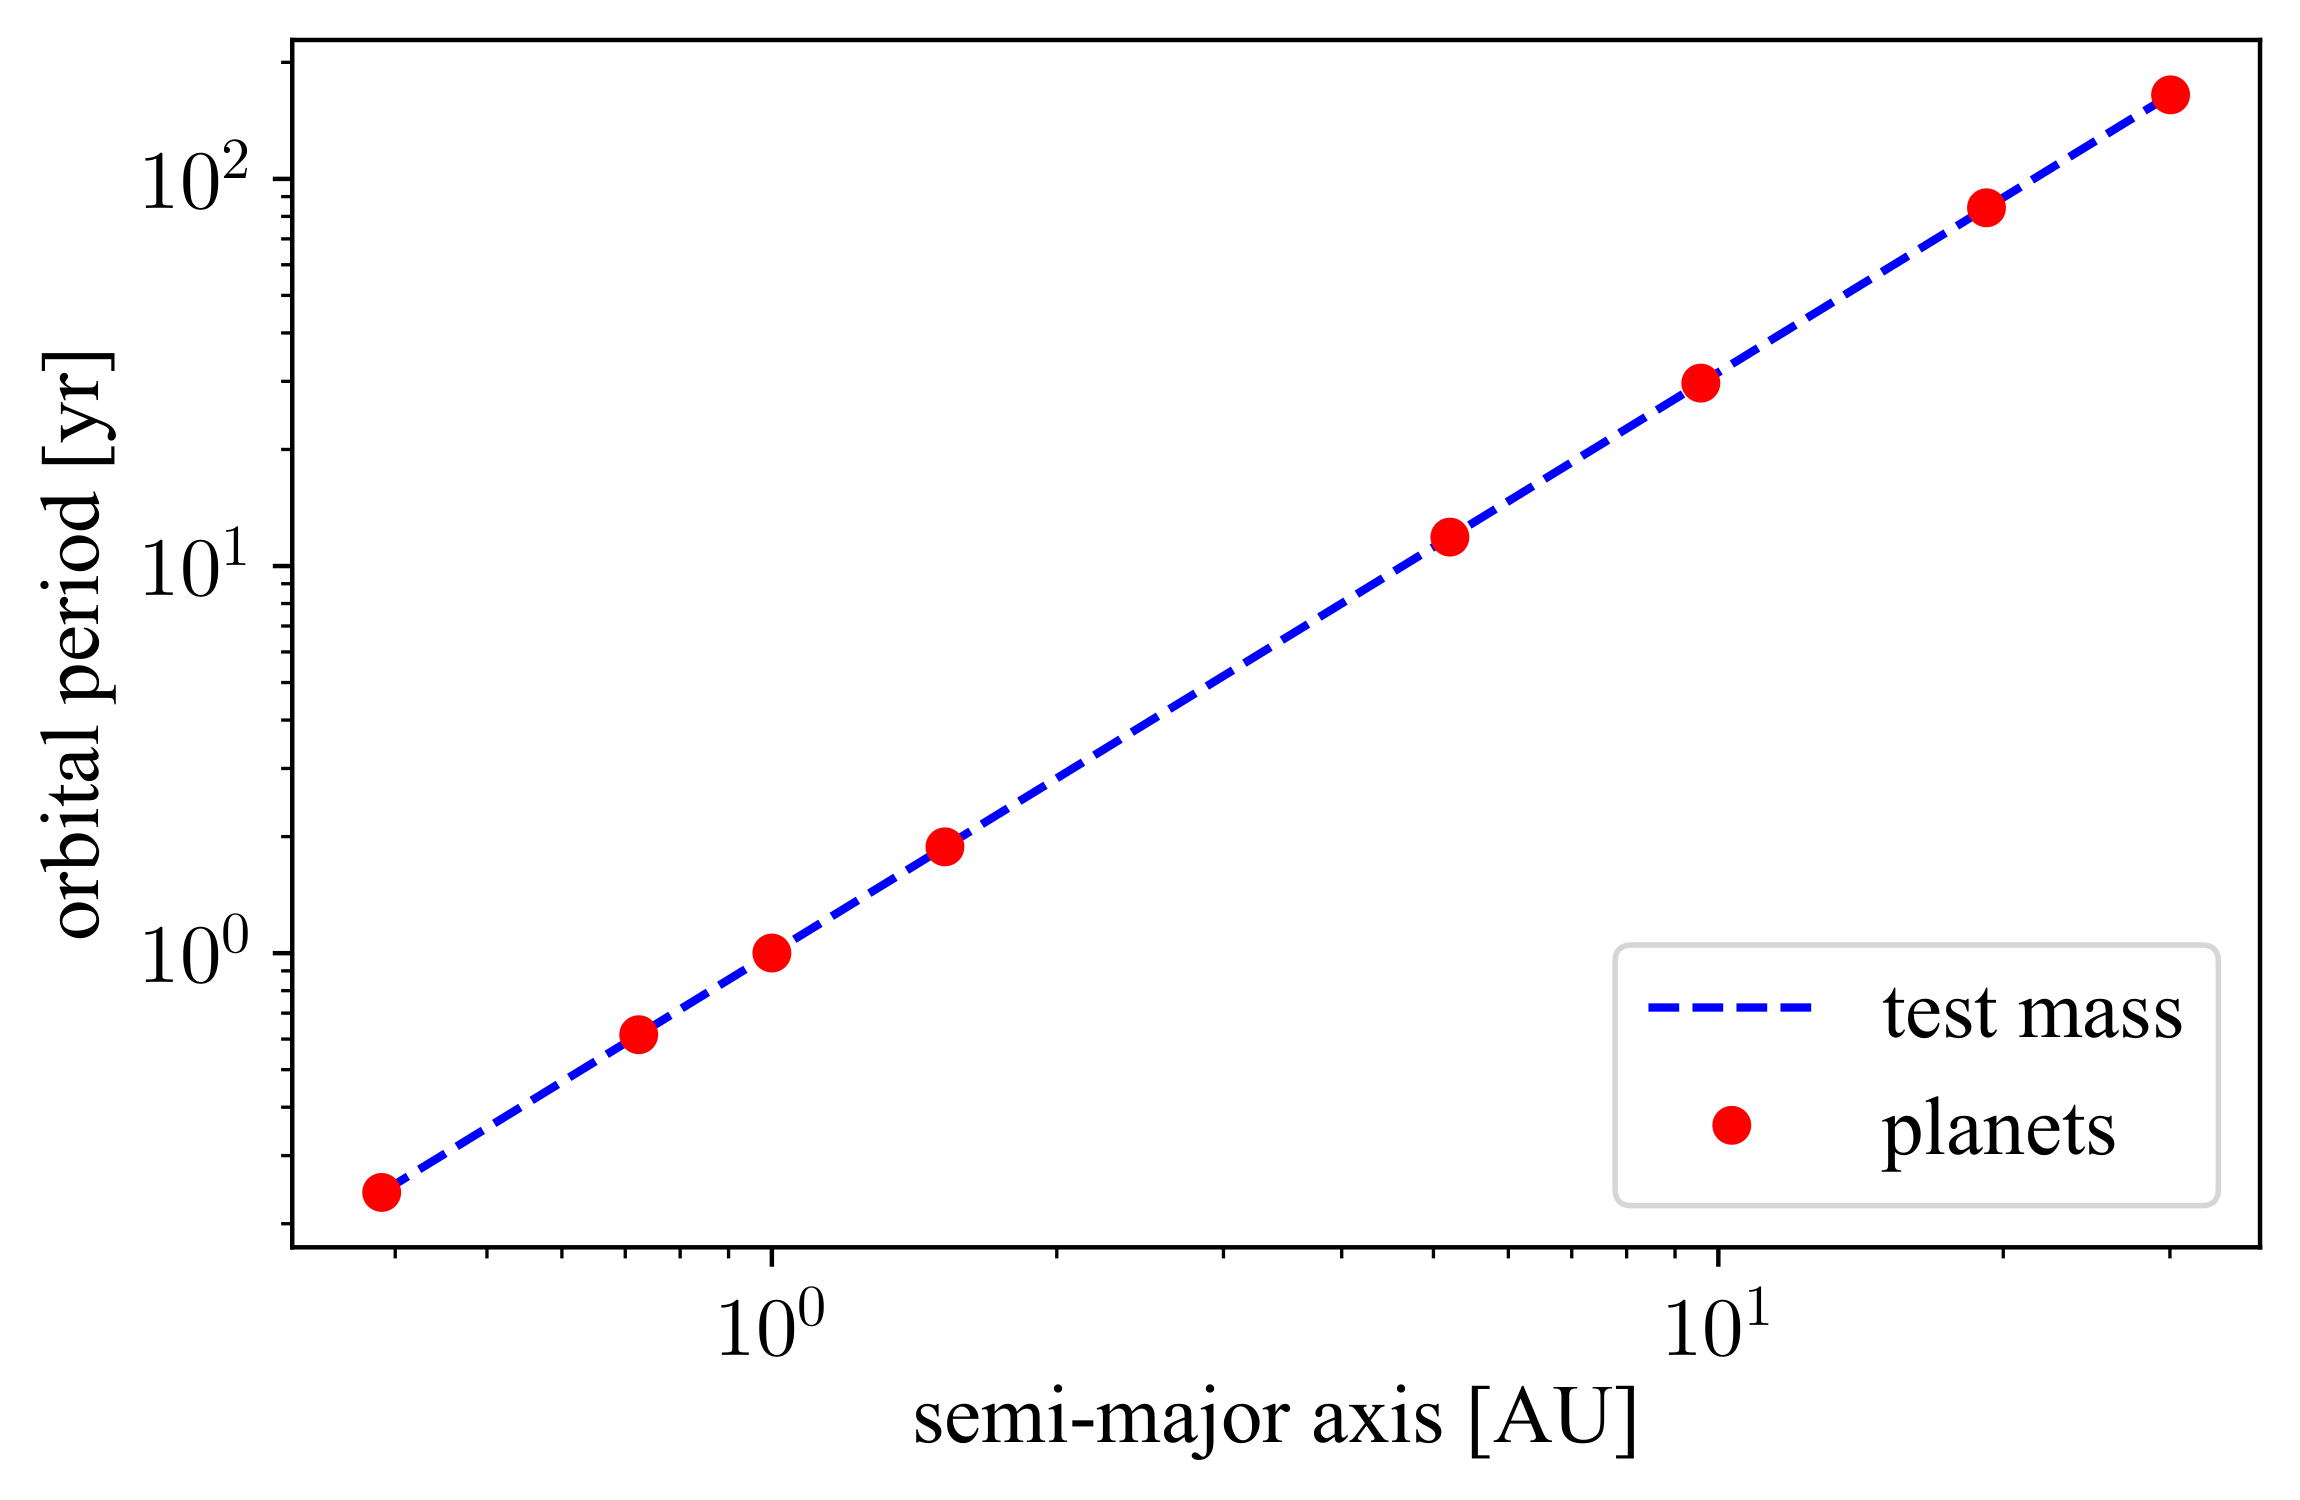

In [46]:
plt.gcf()

# Exercises

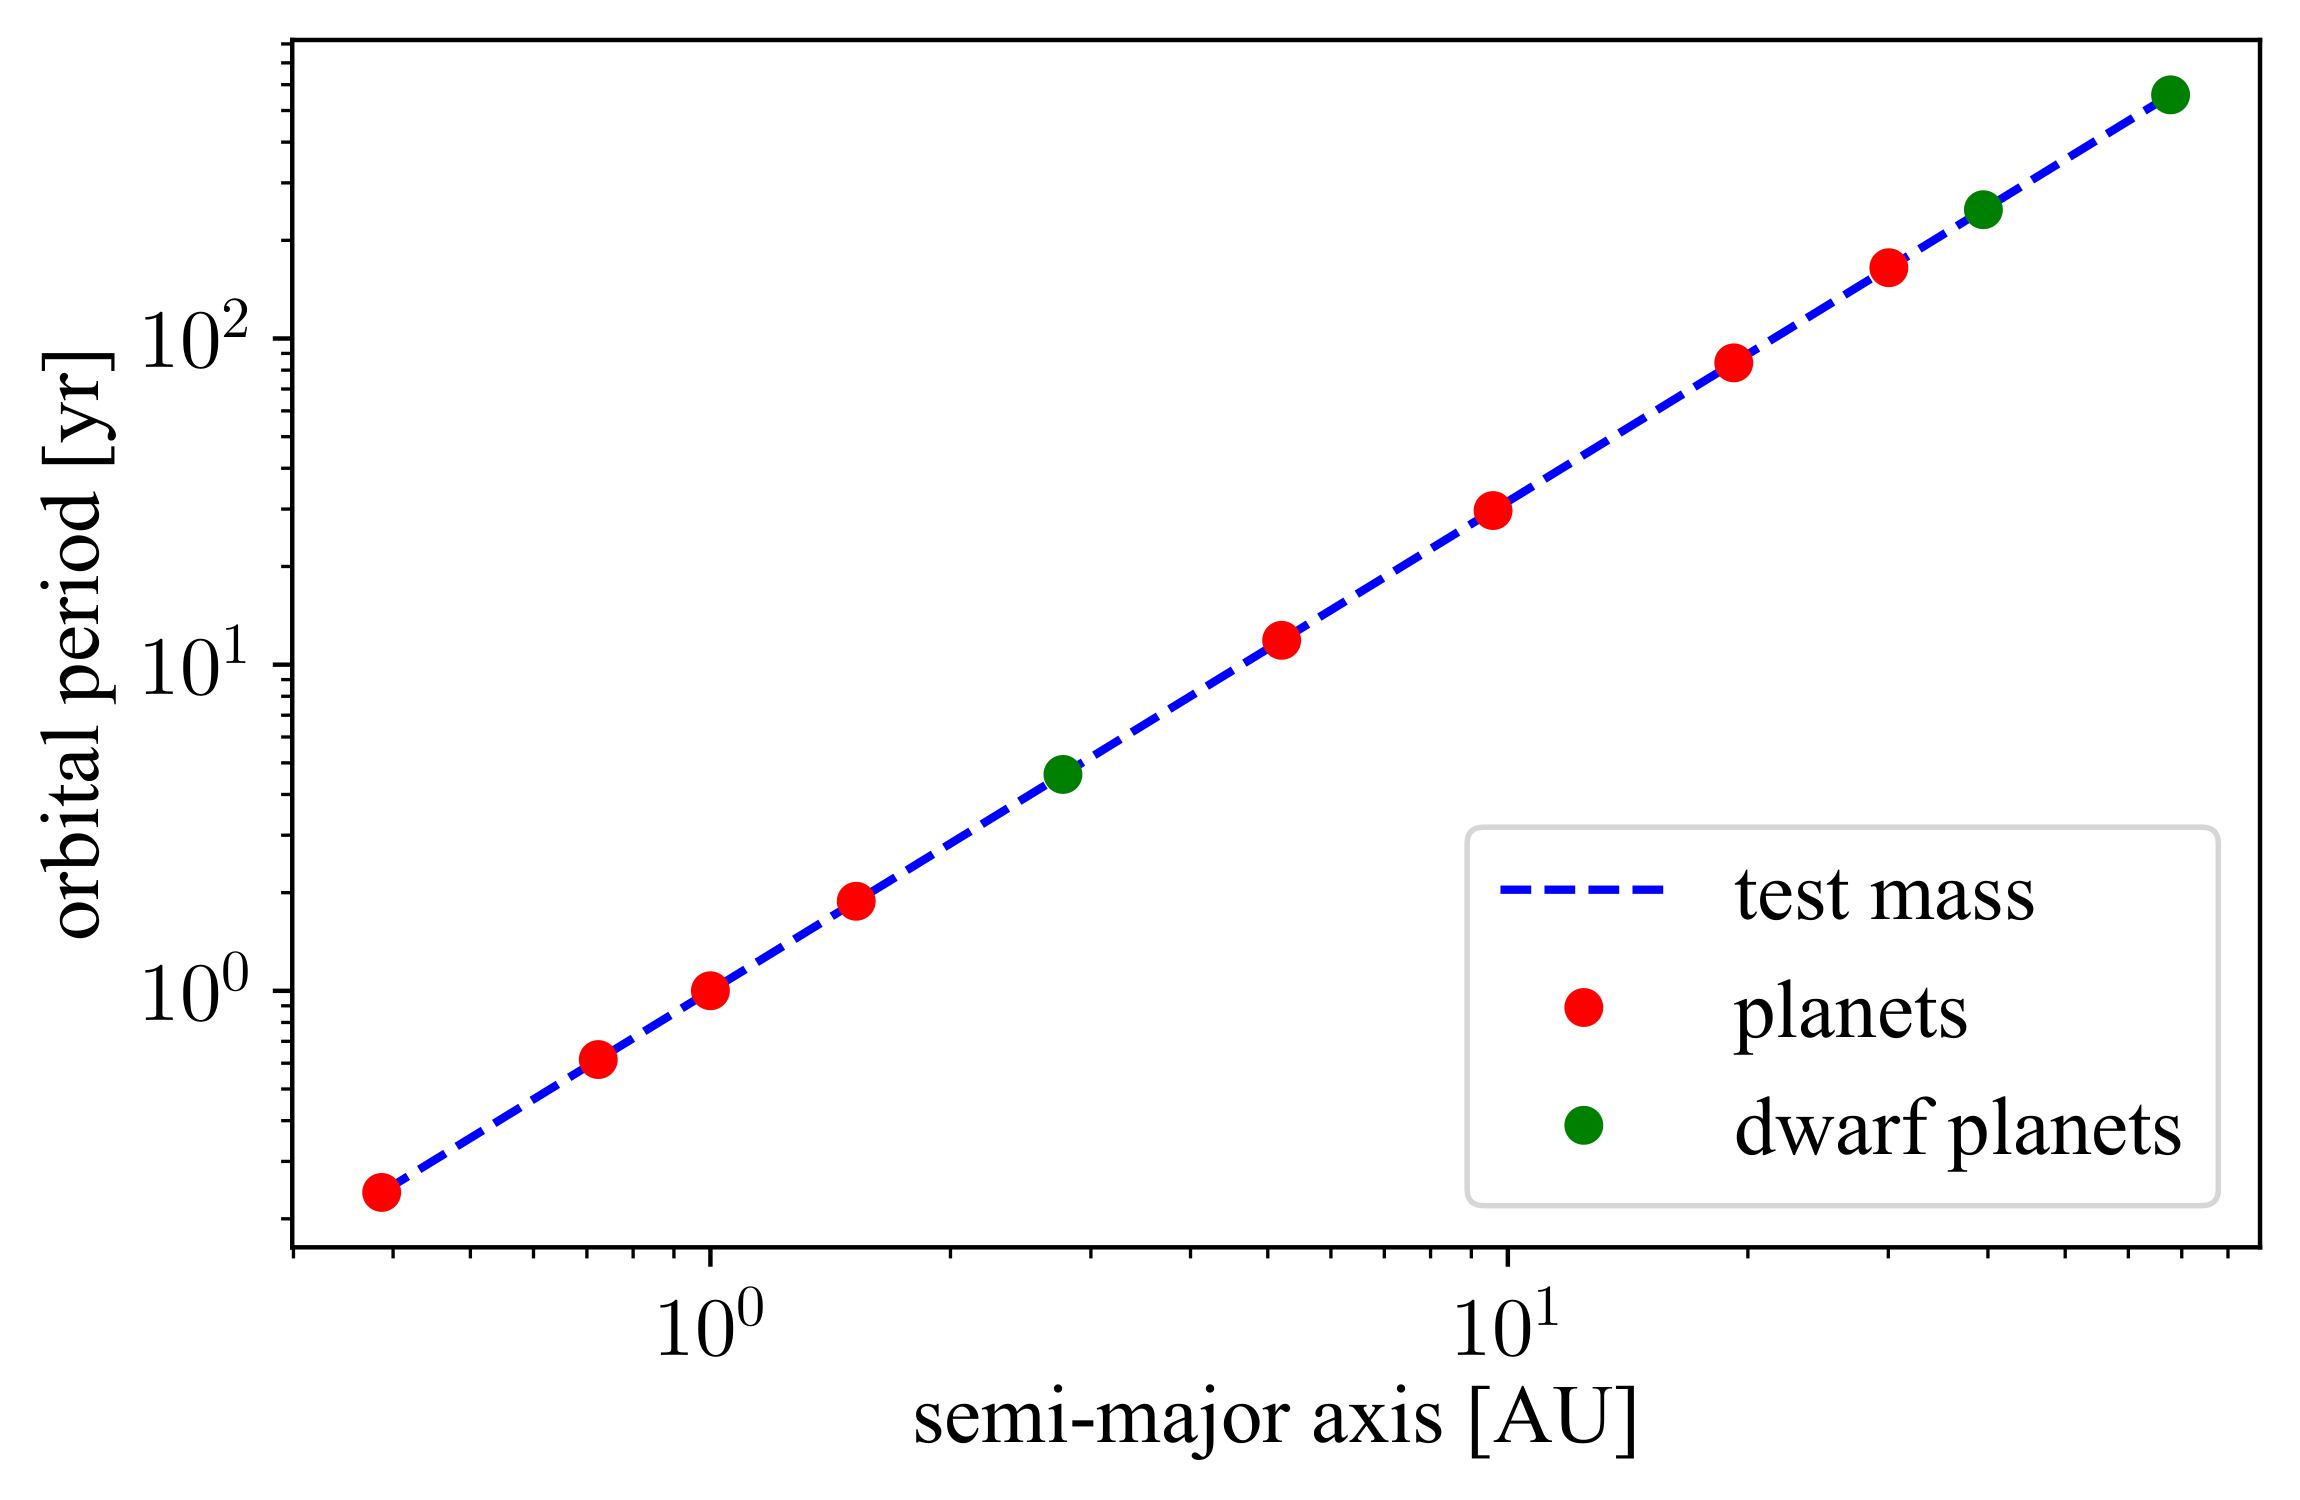

In [70]:
#2.8
dwarf_planets = np.array([39.48 *au,  2.7675 * au, 67.781 * au])
T_dwarf =  2 * math.pi * (G*M)**(-1/2) * dwarf_planets ** (3/2)
a2 = np.sort(np.append(a, dwarf_planets))
T2 = np.sort(np.append(T_test_mass, T_dwarf))
plt.figure()
plt.loglog(a2/au, T2/year, 'blue', linestyle='--',\
          label='test mass')
plt.loglog(a/au, T_two_body/year, 'ro', label='planets')
plt.loglog(dwarf_planets/au, T_dwarf/year, 'go', label='dwarf planets')
plt.legend(loc='lower right')
plt.xlabel("semi-major axis [AU]")
plt.ylabel("orbital period [yr]")
plt.tight_layout()
plt.savefig('exercise 2-8.pdf')
plt.gcf()

In [87]:
#2.9
from scipy.constants import day
from astropy.constants import M_jup
M_j = M_jup.value
M_s = M_sun.value
exoplanets = {"CoRoT-3 b":[4.257 * day, 22 * M_j, 1.37 * M_s],
              #With a mass larger than 13MJ, CoRoT-3 b is a brown dwarf
                      "Kepler-14 b": [6.790*day, 8.4*M_j, 1.51*M_s],
                      "Kepler-412 b":[1.721*day, 0.94*M_j, 1.17*M_s],
                      "HD 285507 b":[6.088 *day, 0.92 *M_j, 0.73*M_s],
                      "WASP-10 b":[3.093*day, 3.19*M_j, 0.79*M_s],
                        "WASP-88 b":[4.954*day, 0.56 * M_j, 1.45*M_s],
                      "WASP-114 b":[1.549*day, 1.77 * M_j, 1.29*M_s]}

$P^2=\dfrac{4\pi^2}{G(M+m)}a^3$

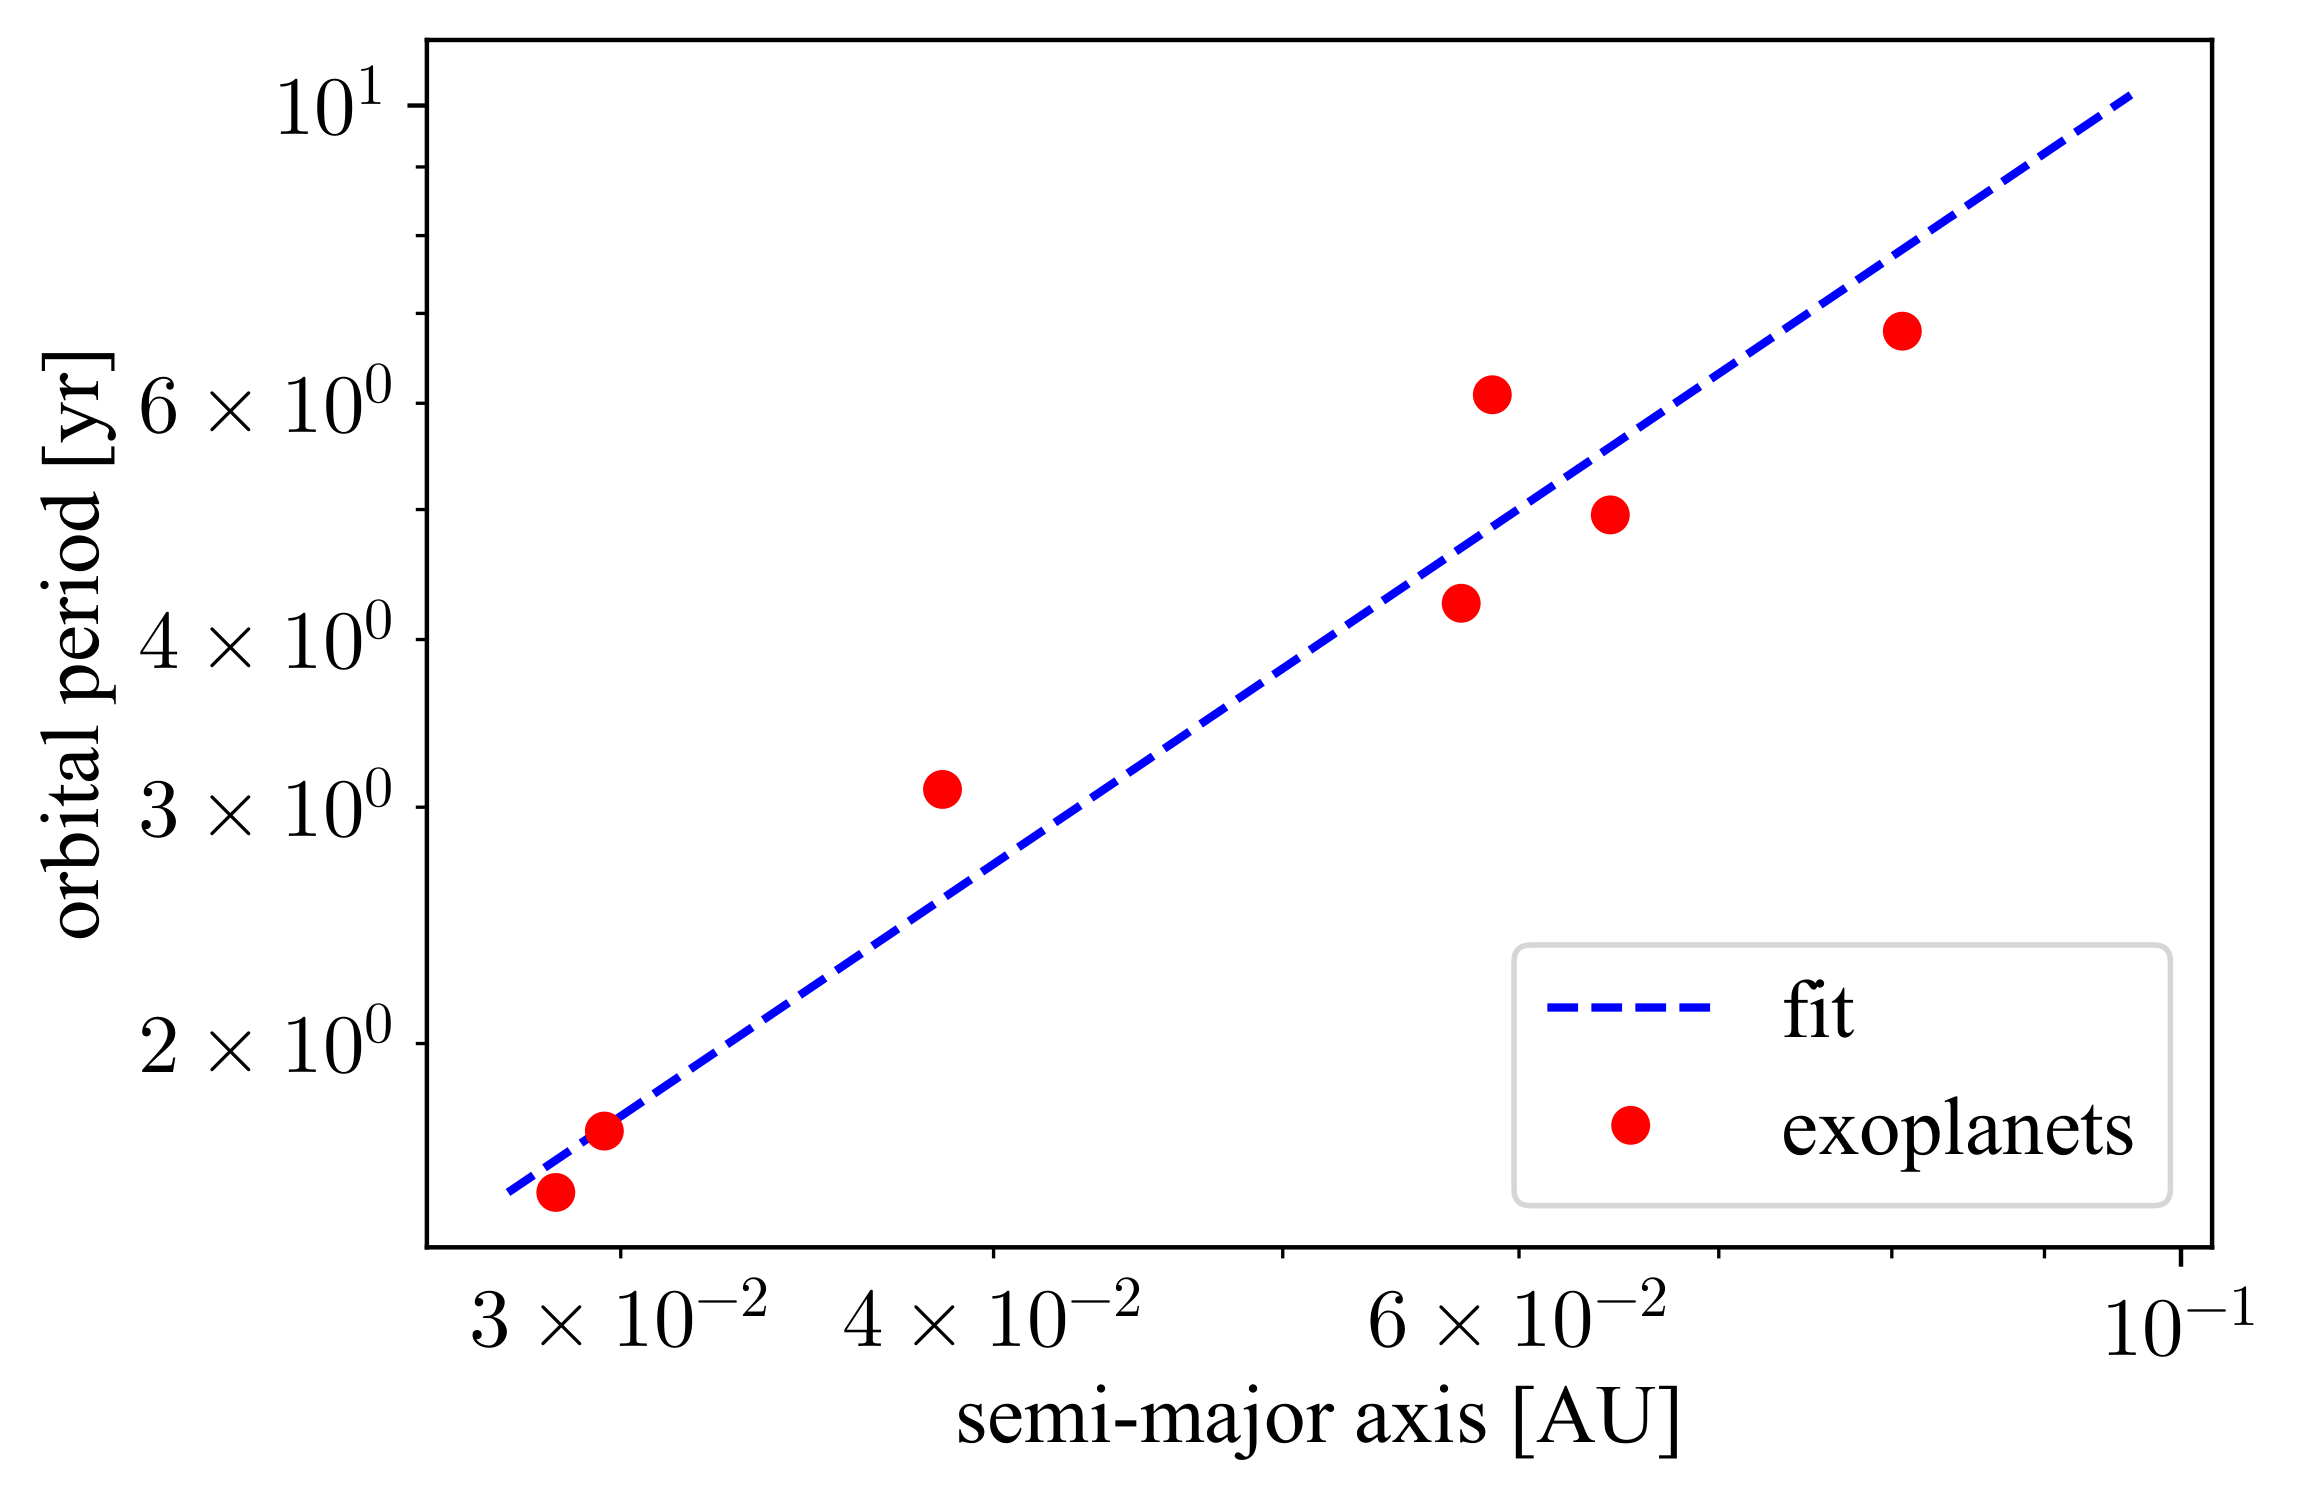

In [126]:
data = np.array(list(exoplanets.values()))
a = (data[:, 0] ** 2 * G * (data[:, 1] + data[:, 2]) / (4 * np.pi**2))**(1/3)
fit = np.polyfit(np.log(data[:, 0]/day),np.log(a/au), 1)
op = np.linspace(data[:, 0].min(), 1.5 *data[:, 0].max(), 200)
sma = np.exp(fit[0] *np.log(op/day) + fit[1]) * au
plt.figure()
plt.loglog(sma/au, op/day, 'blue', linestyle='--', label='fit')
plt.loglog(a/au, data[:, 0]/day, 'ro', label='exoplanets')
plt.legend(loc='lower right')
plt.xlabel("semi-major axis [AU]")
plt.ylabel("orbital period [yr]")
plt.tight_layout()
plt.gcf()

In [227]:
#2.10
from IPython.display import Latex
r_earth = 1 * au
r_mars = 1.524 * au
a_H = (r_earth + r_mars)/2
Latex(f'$a_H={a_H/au:.2f}\; \mathrm {"a"} \mathrm {"u"}$'.format(1,2))

<IPython.core.display.Latex object>

## Vis-viva Equation
$v^2=G(M_1+M_2)\left(\dfrac{2}{d}-\dfrac{1}{a}\right)$

In [228]:
v_p = (G * M_s *(2/r_earth - 1/a_H)) ** (1/2)

Latex(f'$v_p={v_p/1000:.2f}\;\mathrm {{km/s}}$')


<IPython.core.display.Latex object>

In [229]:
v_earth = 2 * np.pi * r_earth/year
Latex(f'$v_{{\oplus}}={v_earth/1000:.2f}\;\mathrm {{km/s}}$')

<IPython.core.display.Latex object>

In [230]:
delta_v = v_p - v_earth
Latex(f'$\Delta v={delta_v/1000:.2f}\;\mathrm {{km/s}}$')

<IPython.core.display.Latex object>

In [243]:
t_H = (4 * np.pi ** 2/ ( G* M_s) * a_H **3) ** ( 1/2 )/2
Latex(f"$t_{{\mathrm{{H}}}} = {t_H/day:.2f}\;\\text{{day}}$")

<IPython.core.display.Latex object>

In [255]:
T_mars = (4 * np.pi**2/(G * (M_s + 22792e7)) * r_mars**3)**(1/2)
delta = 180 - 360/T_mars * t_H
Latex(f"$\delta={delta:.2f}^{{\circ}}$")

<IPython.core.display.Latex object>